In [2]:
!pip install scikit-learn




In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt

In [7]:

# Create some data
np.random.seed(0)
X = np.random.randint(0, 11, size=(30,1))  # Independent variable (hours studied)
y = np.clip(10 * X + np.random.randint(-30, 30, size=(30,1)), 0, 100)  # Dependent variable (test scores)



In [8]:
X.min(), X.max(), y.min(), y.max()

(np.int64(0), np.int64(10), np.int64(0), np.int64(100))

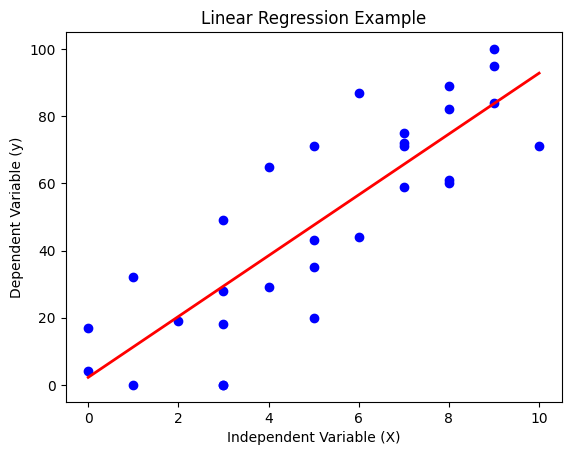

In [11]:
# Create a linear regression model
linear_model = LinearRegression()

# Fit the model
linear_model.fit(X, y)

# Make predictions
X_new = np.array([[0], [10]])
y_predict = linear_model.predict(X_new)

# Plotting the results
plt.scatter(X, y, color='blue')  # plot the data points
plt.plot(X_new, y_predict, color='red', linewidth=2)  # plot the regression line
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Example')
plt.show()

# Logistic Regression

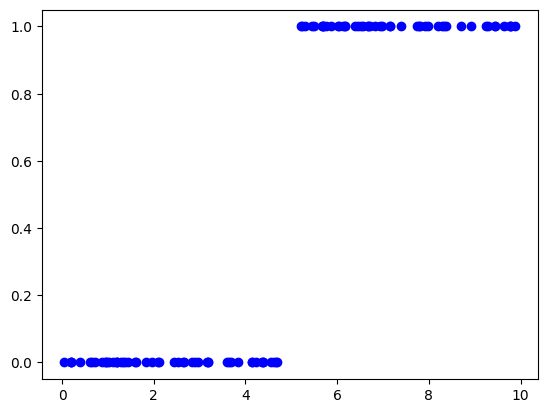

In [12]:
# Create some data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Independent variable (e.g., hours studied)
y = (X > 5).astype(np.float64).ravel()  # Dependent variable (e.g., pass/fail)
plt.scatter(X, y, color='blue')  # plot the data points
plt.show()

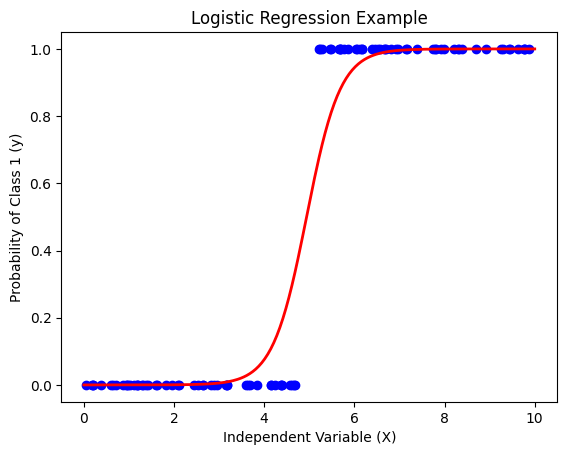

In [38]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the model
logistic_model.fit(X, y)

# Make predictions
X_test = np.linspace(0, 10, 300)
y_prob = logistic_model.predict_proba(X_test.reshape(-1, 1))[:, 1]

# Plotting the results
plt.scatter(X, y, color='blue')  # plot the data points
plt.plot(X_test, y_prob, color='red', linewidth=2)  # plot the logistic regression curve
plt.xlabel('Independent Variable (X)')
plt.ylabel('Probability of Class 1 (y)')
plt.title('Logistic Regression Example')
plt.show()

In [48]:
logistic_model.predict(np.array(4.9).reshape(1,1))

array([0.])

# SVM

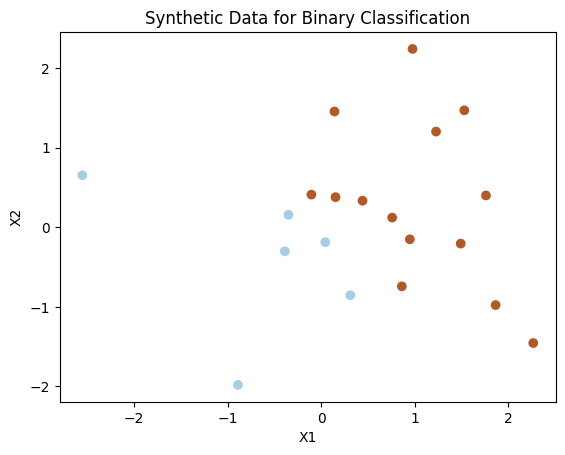

In [13]:
# Create random data
np.random.seed(0)
X = np.random.randn(20, 2)
Y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Synthetic Data for Binary Classification')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [16]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

# Train the classifier on the training data
clf.fit(X_train, Y_train)

# Make predictions
Y_pred = clf.predict(X_test)

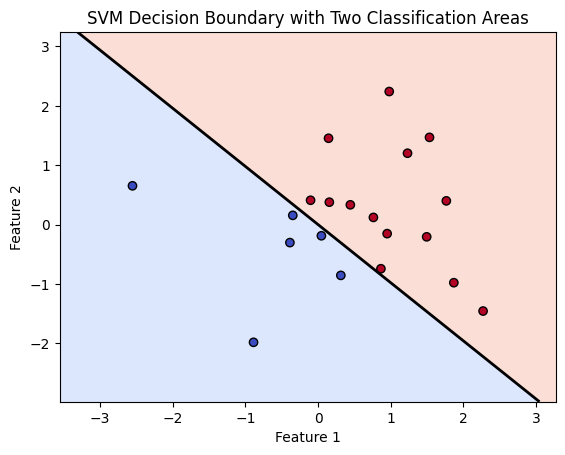

In [17]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Evaluate decision function
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot classification areas
plt.contourf(xx, yy, Z > 0, alpha=0.3, cmap=plt.cm.coolwarm)

# Plot decision boundary
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="k")

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, edgecolors="k")

plt.title("SVM Decision Boundary with Two Classification Areas")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# KNN

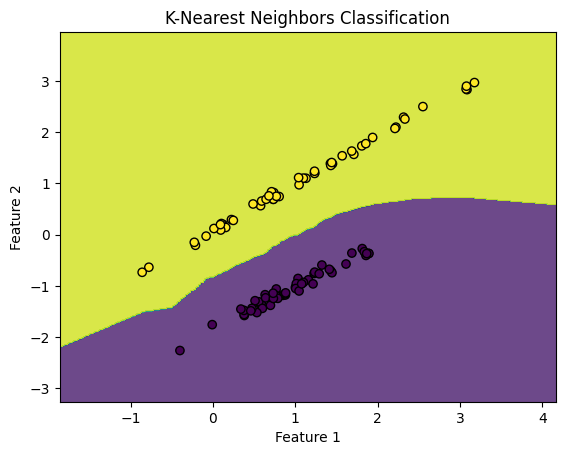

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a random binary classification problem.
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Create a KNN classifier model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model
knn.fit(X, y)

# We create a mesh of points to visualize the decision boundaries of the KNN classifier
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                 np.arange(y_min, y_max, 0.02))

# Predict class for each point in the mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the results
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Nearest Neighbors Classification')
plt.show()

# Naive Bayes

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Sample data
# Features: weight (grams), color (0 = Green, 1 = Yellow, 2 = Red)
# Target: types of fruits
features = np.array([[150, 2], [170, 0], [50, 2], [70, 2], [200, 1], [180, 1]])
labels = np.array(["Apple", "Apple", "Cherry", "Cherry", "Banana", "Banana"])

# don't bother for this step, it is just used to encode string labels to integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Creating and training the Naive Bayes model
model = GaussianNB()
model.fit(features, labels_encoded)

# Making predictions
# Let's predict the fruit type for a 160g green fruit and a 190g yellow fruit
predicted = model.predict([[160, 0], [190, 1], [100, 2]])
predicted_labels = label_encoder.inverse_transform(predicted)

print(f"Predictions: {predicted_labels}")

Predictions: ['Apple' 'Banana' 'Cherry']


# Decision Trees

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [5]:
from sklearn.tree import export_text

# Show the decision rules
tree_rules = export_text(dt_classifier, feature_names=iris.feature_names)
print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



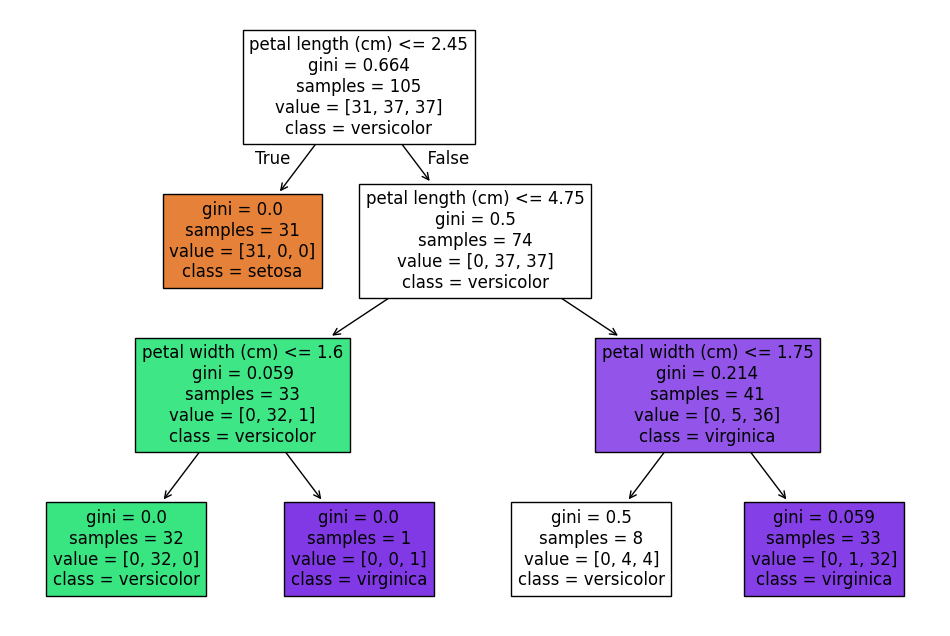

In [6]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(dt_classifier,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True)
plt.show()